# 🏥 Insurance Data Analysis using Python

This project performs an exploratory data analysis (EDA) on a health insurance dataset to understand how personal and lifestyle-related factors influence medical insurance charges.

We will:
- Explore the dataset using Python
- Visualize feature-target relationships
- Identify key insights
- Build a simple linear regression model to predict charges


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Dataset overiview

In [5]:

#rows x column
print("Shape of the dataset: ", df.shape)

#checking the data types of each column
print("\n\n Data types: ")
print(df.dtypes)

Shape of the dataset:  (1338, 7)


 Data types: 
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [7]:
#quick summary of the dataset
print("\n Dataset Info: ")
print(df.info())


#basic statistical summary for numerical columns - age, bmi, children & charges 
print("\n\n Statistical Summary: ")
print(df.describe())


 Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


 Statistical Summary: 
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000  

In [9]:
#doing some random checks to see if any inconsistency 

df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

##### checking for missing values

In [12]:
print("Missing values in each column: ")
print(df.isna().sum())

Missing values in each column: 
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


##### Exploring relationship btw the target column & feature columns
- Based on the project's objective, the target column is <b>charges </b>
- And rest of the remaining 6 columns are the feature columns that will determine the charges
- Out of 6 columns, three cols. i.e., <b>age, bmi & children</b> are numerical hence, we will use Scatter plots to see their relationship with the target column i.e., charges.
- And the rest of the 3 non-numerical cols. like <b>region, sex & smoker</b>, we will use countplot to see the relationship with the target col.

###### Count Plots for Categorical Features


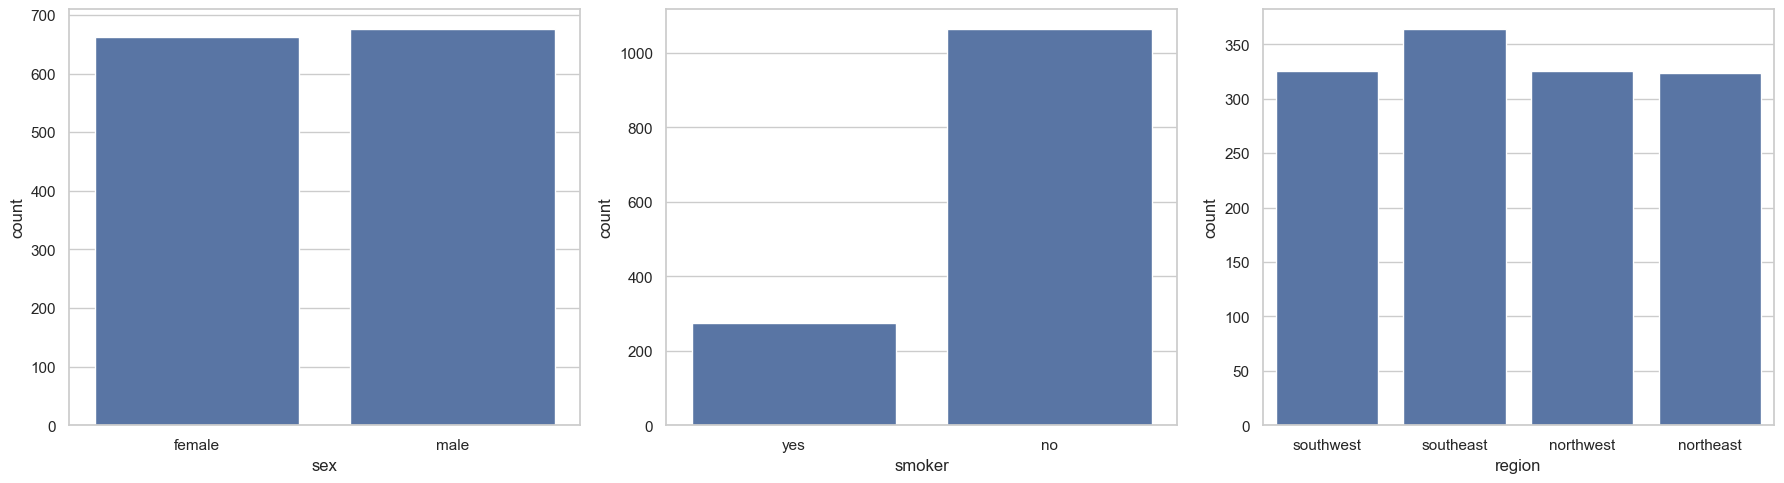

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=df, x='sex', ax=axes[0])
sns.countplot(data=df, x='smoker', ax=axes[1])
sns.countplot(data=df, x='region', ax=axes[2])
plt.tight_layout()
plt.show()

##### Observation:

- The **gender distribution** appears nearly even, with a slightly higher count of **male** policyholders. While this balance ensures minimal gender-related skew in the dataset, it's interesting to note that gender later shows **minimal correlation with insurance charges**. This suggests that pricing may be more strongly influenced by health-related and behavioral factors than by demographic ones like sex — an insight important for fair pricing policies.

- The **smoking status** distribution is **highly imbalanced**, with **non-smokers vastly outnumbering smokers**. This imbalance raises a few considerations:
  - The sharp disparity reflects real-world smoking trends, but also suggests that **smokers are a minority who may disproportionately impact the cost structure** due to higher associated health risks.
  - From a modeling perspective, this imbalance could skew predictions if the model overgeneralizes from the non-smoker majority. It may be beneficial to apply **stratified sampling** or analyze **feature importance** to ensure smokers’ influence is appropriately captured.

- In terms of **region**, the population is relatively well-distributed across the four U.S. regions, with a slight dominance from the **southeast**. While regional differences in average charges are not immediately evident from this count plot alone, this segmentation can be useful in examining:
  - Whether **regional healthcare access** or **policy costs** influence premiums.
  - How **regional lifestyle habits** (e.g., diet, activity level) might correlate with variables like BMI or smoking prevalence.

This initial overview helps build foundational context and prompts important analytical questions that guide the rest of the exploratory analysis.


##### Scatter Plots for Numerical Features vs Charges


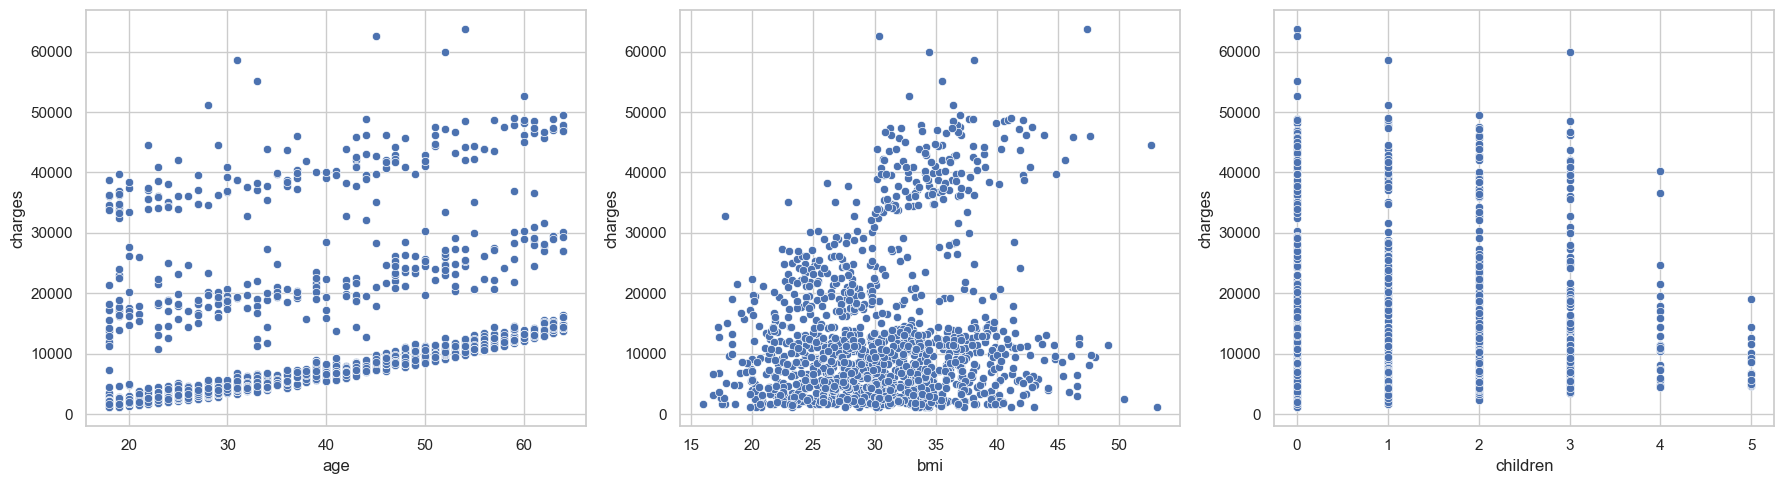

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(data=df, x='age', y='charges', ax=axes[0])
sns.scatterplot(data=df, x='bmi', y='charges', ax=axes[1])
sns.scatterplot(data=df, x='children', y='charges', ax=axes[2])
plt.tight_layout()
plt.show()


##### Observation:

- **Age vs. Charges**:  
  There is a **clear upward trend** indicating that **insurance charges tend to increase with age**. This pattern aligns with expectations, as older individuals generally face higher health risks, leading to greater insurance costs. However, the **non-linearity** in the pattern suggests that age alone doesn't explain all the variation in charges — likely, its impact is **amplified when combined with other factors** (such as smoking). This highlights the potential value in testing **interaction terms** during modeling.

- **BMI vs. Charges**:  
  The scatter plot for BMI is more dispersed, showing **no strong linear relationship**, but a cluster of **high charges at higher BMI values** is noticeable. This suggests that:
  - While BMI alone may not be a consistent predictor of charges, **outliers with high BMI** can incur significantly larger costs, possibly due to obesity-related conditions.
  - It raises a hypothesis: is there a **threshold BMI**, beyond which costs spike — especially for smokers or older individuals? Investigating this with interaction plots or segmentation might reveal deeper patterns.

- **Children vs. Charges**:  
  Interestingly, the number of children shows **very little to no correlation** with insurance charges. This implies that **dependent count may not significantly influence premium costs**, at least in this dataset. It might be due to the fact that the policyholder’s individual health risk is prioritized over family size in determining costs.  
  However, one could further explore if **family plans** or **region-specific policies** affect this — possibly in the backend business logic that this dataset doesn’t capture.

Overall, this visual analysis reinforces that **age and BMI** are more relevant predictors than the number of children — a key insight for feature selection and understanding insurance cost drivers.


#### Feature-to-Feature Relationships

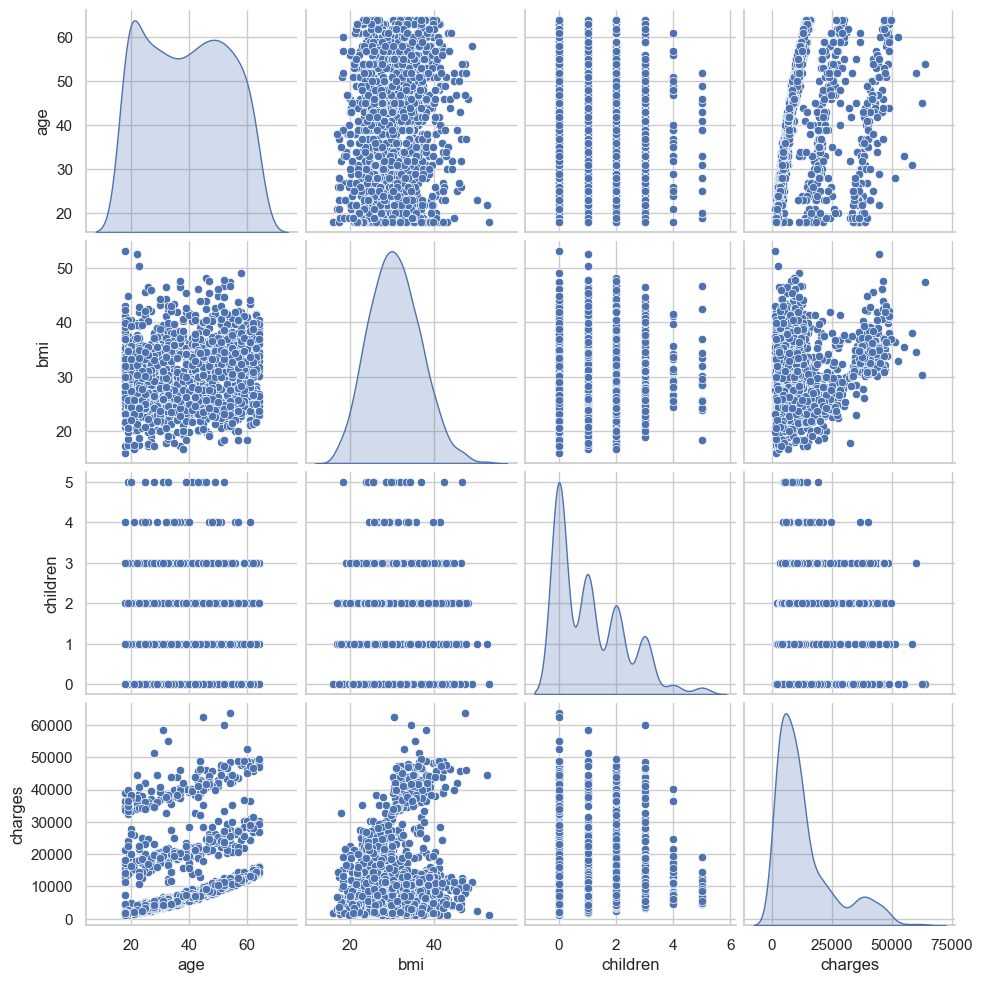

In [24]:
sns.pairplot(df[['age', 'bmi', 'children', 'charges']], diag_kind='kde')
plt.show()


##### Correlation heatmap

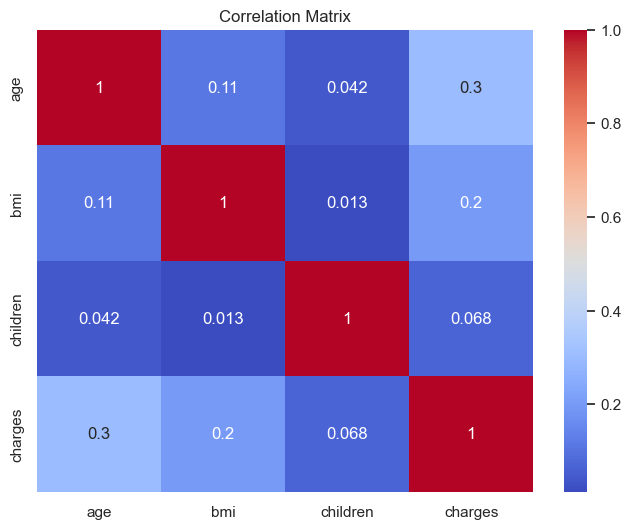

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


##### Observation:

The correlation heatmap shows the pairwise linear relationships between numerical variables in the dataset (`age`, `bmi`, `children`, and `charges`):

- `age` has the **strongest positive correlation with `charges` (0.30)**. This indicates that as people age, their medical expenses tend to increase, which is expected due to age-related health risks. While the correlation is moderate, it still makes `age` a valuable predictor.

- `bmi` has a **weaker positive correlation with `charges` (0.20)**. This suggests that individuals with higher BMI may face slightly higher insurance costs, but the relationship is not very strong. The impact of BMI might be more pronounced when combined with categorical factors like smoking, which is not reflected in this numeric-only matrix.

- `children` has a **very weak positive correlation with `charges` (0.07)**, implying that the number of children does not significantly influence the cost of insurance in this dataset. This insight is consistent with earlier scatter plot observations.

- The correlations among the independent variables (`age`, `bmi`, and `children`) are all very low, which is good for model stability — it means there's **low multicollinearity** among features.

In summary, while none of the numerical features have very high correlation with charges, `age` and `bmi` still show some predictive value. Categorical variables (like smoking) likely hold stronger relationships with charges and should be included in modeling.


##### Imapct of Smoking and Age on Charges

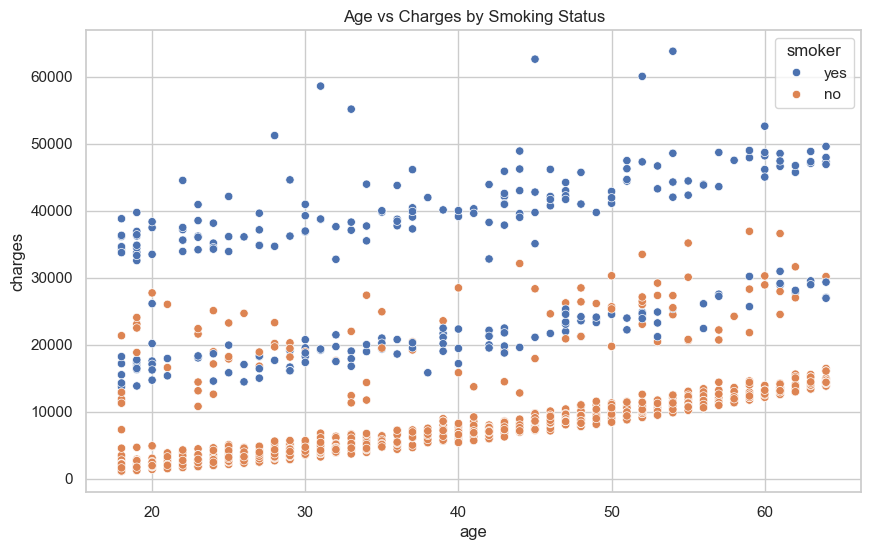

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Age vs Charges by Smoking Status")
plt.show()


##### Observation:

This scatter plot reveals a **strong interaction between age, smoking status, and insurance charges**:

- **Smokers consistently incur significantly higher charges** than non-smokers across all age groups. The separation between the two categories is especially noticeable, indicating that **smoking status is a dominant cost driver** in this dataset.

- Among smokers, charges increase **sharply with age**, and there is a visible **non-linear trend** — older smokers face exponentially higher costs. This likely reflects the compounding health risks associated with aging and smoking combined.

- For **non-smokers**, the increase in charges with age is more **gradual and linear**. The cost difference between younger and older non-smokers is present, but not as dramatic as in smokers.

- Interestingly, some **younger smokers already have elevated charges**, which suggests that **smoking affects premiums regardless of age** — possibly due to the increased risk of preventable chronic diseases.

This plot supports the need to include **interaction terms or non-linear models** if we aim to improve predictive performance. It also reinforces that **smoking status is not only a standalone risk factor but significantly amplifies the effect of age on charges** — a key insight for both modeling and policy pricing.


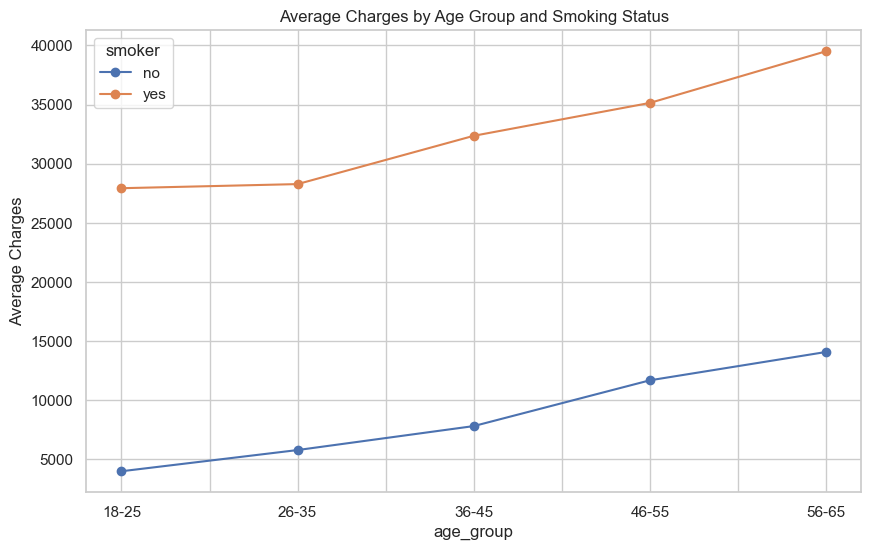

In [33]:
df['age_group'] = pd.cut(df['age'], bins=[17, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
avg_charges = df.groupby(['age_group', 'smoker'])['charges'].mean().unstack()

avg_charges.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Average Charges by Age Group and Smoking Status")
plt.ylabel("Average Charges")
plt.grid(True)
plt.show()


#### Linear Regression Model to Predict Charges

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Encode categorical variables
df_encoded = pd.get_dummies(df.drop('age_group', axis=1), drop_first=True)

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.7835929767120724
Root Mean Squared Error: 5796.284659276272


##### Model Interpretation & Analysis

- The **R² score of 0.78** indicates that approximately **78% of the variance** in insurance charges can be explained by the input features in the model. This suggests a **reasonably strong relationship** between the predictors and the target variable (`charges`), although there's still **22% of variability** that the model does not capture — likely due to factors not included in the dataset or non-linear interactions.

- The **Root Mean Squared Error (RMSE) is approximately 5796**, which means that on average, the model's predictions deviate from the actual insurance charges by about **$5,796**. Given that some charges go above $60,000, this error may be acceptable for a baseline model, but it's still **significant** — especially if high-precision cost estimates are required in real-world scenarios.

- The model likely picked up **smoking status, age, and BMI** as the most influential predictors, given their strong individual relationships with charges observed during EDA. These features have a **clear and measurable impact** on the predicted charges.

- However, it's important to note that **linear regression assumes linear relationships**, which may limit its ability to fully capture complex interactions — for example, how the effect of BMI on charges might change depending on smoking status.

- To improve predictive accuracy, future steps could include:
  - Trying **non-linear models** like Random Forest or Gradient Boosting.
  - Applying **feature scaling** and **interaction terms**.
  - Using **regularization techniques** (Ridge, Lasso) to reduce overfitting or multicollinearity.

This basic regression model offers a **solid starting point** and provides clear insights into which factors influence insurance charges most. However, further refinement is needed for deployment in real
